## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (insane)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [3]:
directory = '/home/user/notebooks/pcaps/nmap_tcp_full_scan_insane'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.071969
Name: time, dtype: float64

In [6]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    0.071969
1    0.093341
2    0.074307
3    0.077156
4    0.078393
5    0.074475
6    0.073711
7    0.089296
8    0.073030
9    0.074040
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    0.077972
dtype: float64

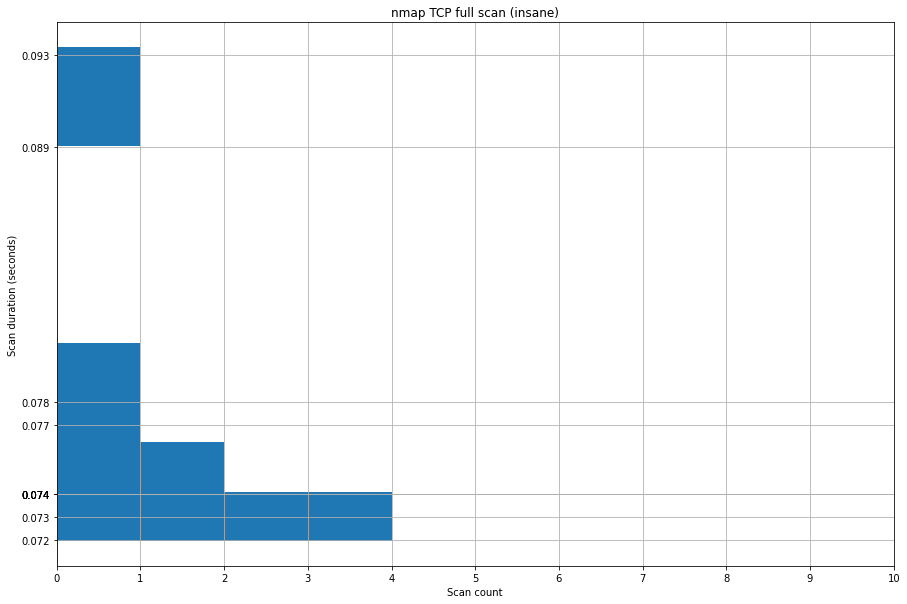

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

0
count  10.000000
mean    0.077972
std     0.007341
min     0.071969
25%     0.073793
50%     0.074391
75%     0.078084
max     0.093341

## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1559.4367980957031



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 55024 22
2 40502 1723
3 50074 110
4 56262 256
5 38434 111
6 57034 8080
7 35814 1025
8 59218 445
9 50824 3306
10 34462 443
11 50066 199
12 42462 25
13 33256 3389
14 53778 135
15 47218 143
16 52272 993
17 35272 23
18 59010 139
19 48678 80
20 47478 5900
21 54880 53
22 50536 554
23 35896 995
24 55180 21
25 59632 8888
26 48870 113
27 47356 1720
28 36876 587
29 37944 27355
30 42492 1069
31 41662 911
32 60790 9081
33 55756 5907
34 59114 3827
35 47322 49
36 44054 1935
37 57342 2608
38 55230 6792
39 45184 1034
40 43710 6510
41 40302 888
42 36646 9575
43 57766 1056
44 57752 843
45 44396 3261
46 49890 60443
47 42368 52848
48 35160 61900
49 52232 636
50 37304 4279
51 47390 50300
52 45900 4006
53 55948 2022
54 53154 1583
55 56294 1198
56 41674 3370
57 40770 1078
58 39468 6156
59 58498 27352
60 50788 3168
61 33192 32773
62 59666 9010
63 45776 7001
64 39748 1055
65 54726 21571
66 60214 5822
67 56494 1070
68 45928 1030
69 60148 18101
70 33220 99
71 46436 987
72 38834 3367
73 52550 340
74 56870 4445


619 40296 5061
620 56850 3071
621 40546 1039
622 60178 2047
623 32946 1029
624 42510 4000
625 48442 5298
626 44490 2557
627 54754 5200
628 54768 34571
629 38148 125
630 45218 2492
631 37860 990
632 54014 49176
633 54220 10617
634 48490 2381
635 33050 7435
636 55122 259
637 39840 1037
638 41092 1036
639 33056 6006
640 53986 2200
641 38006 2035
642 59594 3517
643 44218 9998
644 43626 1106
645 46042 6668
646 34778 8649
647 52120 3369
648 41274 8007
649 40516 6839
650 46738 15660
651 57728 9080
652 33208 1900
653 52828 32772
654 52770 5510
655 40394 19
656 50388 179
657 47622 593
658 45906 4224
659 46382 2393
660 41608 1132
661 49138 1236
662 46870 902
663 57322 5033
664 41302 42
665 52742 32778
666 37848 6547
667 35550 1028
668 58796 1443
669 40046 3351
670 56362 6788
671 39496 1998
672 47956 4111
673 59614 2525
674 58414 9618
675 33136 6009
676 39484 3826
677 54494 2968
678 58014 1096
679 34028 545
680 56580 44501
681 53882 808
682 50520 44176
683 34146 1001
684 42376 1040
685 52246 1074

452 58040 1186
453 39732 3828
454 36166 8443
455 38744 49154
456 46086 2100
457 56522 11967
458 40932 8100
459 39626 3300
460 51998 3013
461 53518 3918
462 55198 1063
463 56890 5850
464 44704 2034
465 53428 3889
466 47580 2010
467 60798 515
468 55848 18101
469 32950 6112
470 45864 85
471 53020 49175
472 50608 1259
473 42150 12174
474 55160 5269
475 38214 2251
476 59002 1311
477 43498 8291
478 39554 1031
479 33762 10082
480 49914 3211
481 55674 3390
482 58820 2967
483 41158 9010
484 55214 5405
485 58626 51493
486 54464 2260
487 51446 5679
488 56156 1272
489 52042 2811
490 36902 1070
491 45778 1021
492 40042 3
493 58114 2382
494 34678 32772
495 53588 9101
496 48728 2002
497 45460 9575
498 56292 1086
499 60260 1501
500 54122 27355
501 48410 1594
502 57306 5988
503 34256 38292
504 35836 1091
505 41550 88
506 47112 89
507 34652 843
508 44046 44176
509 48364 1301
510 38938 1864
511 55882 5633
512 55918 3261
513 48132 416
514 47970 1
515 36778 8090
516 49700 2045
517 43978 5922
518 41948 5960

22 35304 110
23 57364 21
24 49084 143
25 53346 113
26 51920 111
27 37222 995
28 38376 993
29 45216 2522
30 38582 2260
31 33676 7100
32 57790 2043
33 39880 1113
34 46790 10010
35 35618 1096
36 42128 631
37 48394 8443
38 41280 5298
39 32900 8081
40 53594 32777
41 37156 464
42 39200 84
43 35952 9290
44 42836 5200
45 36668 1027
46 55428 8009
47 50218 1048
48 53500 5902
49 49900 3077
50 55536 1311
51 43006 992
52 46968 9100
53 57416 52673
54 37628 10003
55 33976 1322
56 37168 6156
57 45396 12000
58 33972 8093
59 34098 8600
60 56724 49159
61 44110 6004
62 40846 6129
63 52524 3221
64 51020 57797
65 46056 4567
66 45372 1301
67 47180 1163
68 40202 9595
69 52744 5555
70 55576 8290
71 48300 901
72 52158 9050
73 40448 593
74 34164 61532
75 56118 8200
76 54480 2034
77 43986 416
78 54620 912
79 58802 3005
80 44748 5003
81 47274 2135
82 44166 211
83 37512 5560
84 42030 1117
85 34380 1010
86 54566 20221
87 35546 5911
88 42472 1149
89 50680 49175
90 51680 3703
91 41160 50500
92 50844 9220
93 33042 1217

776 48478 1009
777 55594 99
778 41586 8254
779 34586 1719
780 56530 1049
781 60782 44176
782 38994 16992
783 47026 705
784 41732 44443
785 48262 1062
786 39674 8045
787 39766 4445
788 50950 1875
789 48634 3986
790 50726 7025
791 58798 27352
792 36344 49153
793 37052 49158
794 56266 2045
795 50316 3800
796 37448 11111
797 42286 2809
798 35380 1046
799 51862 9575
800 40424 9207
801 44236 9898
802 34066 691
803 51834 3001
804 35812 57294
805 44070 9666
806 47698 5962
807 54588 49156
808 40024 6689
809 59492 687
810 35634 1152
811 36446 4899
812 54548 1104
813 52766 32783
814 48896 9071
815 40082 1972
816 45430 1658
817 44818 2525
818 59400 2604
819 37992 2030
820 43194 9000
821 56956 1433
822 43150 2033
823 51190 1145
824 46460 625
825 44572 9
826 57038 1039
827 59724 787
828 35288 2869
829 54956 5952
830 33788 3889
831 38104 2811
832 48336 9943
833 42786 5061
834 40714 2702
835 43590 2041
836 52574 7435
837 33940 911
838 34576 4006
839 55780 52869
840 50156 1026
841 50456 10004
842 41712

617 43006 3268
618 41922 27356
619 45958 6002
620 47014 1093
621 34190 515
622 34590 1688
623 45850 1062
624 48222 5550
625 60708 1002
626 42992 458
627 55362 1065
628 35370 1030
629 47952 1092
630 46426 9503
631 50174 40193
632 48820 48080
633 57780 8087
634 43432 1186
635 58474 7200
636 48982 2008
637 60048 1166
638 57624 1213
639 57068 52869
640 55954 5862
641 37076 3986
642 56250 10621
643 50540 1600
644 58222 5298
645 34700 17988
646 33572 4449
647 45280 7025
648 46044 212
649 41304 625
650 33942 1700
651 41390 2222
652 45574 8180
653 49320 6789
654 34964 3476
655 35976 465
656 58152 5269
657 48820 3325
658 55122 2144
659 56634 26214
660 59078 1864
661 45434 4321
662 59356 5280
663 54792 9502
664 50382 2394
665 49208 7201
666 58504 8443
667 56752 4443
668 54756 1192
669 33102 6100
670 37016 1717
671 35348 1111
672 42124 5633
673 49128 5877
674 49630 1024
675 47678 6156
676 46858 6112
677 43924 2399
678 48348 631
679 51874 5901
680 44008 2003
681 56220 82
682 41402 144
683 38260 23

234 49272 125
235 44006 301
236 52928 3689
237 41218 10025
238 59912 3871
239 48916 1137
240 33438 1322
241 58390 5922
242 57048 5801
243 36670 20000
244 56606 6667
245 36600 691
246 33512 1199
247 55724 777
248 53934 4224
249 38478 50500
250 43154 5510
251 58716 6000
252 49120 990
253 54024 1443
254 43596 700
255 49332 65000
256 44106 4003
257 43230 8087
258 37652 49153
259 36810 1047
260 59166 19801
261 41612 14238
262 43450 2383
263 39884 513
264 47788 9502
265 33550 6566
266 33752 1102
267 57482 32779
268 43364 306
269 53142 10009
270 47460 2718
271 34930 2002
272 56396 1040
273 39666 5405
274 43092 1113
275 38688 6969
276 37512 1301
277 47670 9943
278 40850 50800
279 33876 7106
280 46330 514
281 33146 6129
282 56624 2811
283 46418 722
284 47900 1201
285 50340 5825
286 37254 3878
287 52142 3031
288 38506 5054
289 57986 1175
290 43412 5004
291 60996 18101
292 42798 1272
293 39112 1082
294 59502 24800
295 39852 4111
296 37744 6692
297 45826 16113
298 58612 4279
299 54864 10010
300 45

783 45068 26
784 36072 2393
785 52544 30718
786 34854 726
787 38662 1021
788 55660 49175
789 47204 6580
790 42878 8001
791 53710 1812
792 35608 6666
793 59228 5859
794 39220 3211
795 39002 2998
796 46690 16993
797 41646 5822
798 39554 9485
799 45688 23502
800 38240 5989
801 54830 32775
802 48346 705
803 47112 7443
804 56272 1524
805 35542 3005
806 60964 1131
807 53054 2492
808 46546 2381
809 60832 7100
810 57044 12174
811 49568 254
812 39794 10626
813 49734 687
814 54052 211
815 55770 5060
816 59648 3351
817 42274 10002
818 55658 10628
819 54522 912
820 57978 1174
821 34600 27000
822 41786 2042
823 40816 616
824 45792 1311
825 44990 32781
826 44912 6789
827 40722 2049
828 60342 2030
829 49512 2702
830 47606 311
831 41362 9900
832 52772 1022
833 43062 2909
834 33064 2100
835 57558 1999
836 45424 18988
837 42838 5815
838 38322 56737
839 41928 5877
840 34114 9290
841 51982 55056
842 48282 81
843 40038 366
844 56698 749
845 47288 38292
846 52220 5000
847 45806 800
848 37626 51103
849 53286

352 56218 255
353 43104 9002
354 46848 1023
355 44436 49156
356 45154 843
357 33888 11110
358 52588 1151
359 40832 6002
360 48202 4449
361 51388 1011
362 56146 37
363 53394 3920
364 50086 70
365 45572 705
366 56466 8701
367 42978 2170
368 38528 2040
369 60220 5030
370 40260 5214
371 40340 2160
372 56508 6566
373 40904 2251
374 49890 1839
375 53628 2809
376 53592 5922
377 33786 49158
378 51446 1114
379 40078 13722
380 40982 30
381 36704 6346
382 57844 4005
383 49346 1094
384 48770 10012
385 39686 14441
386 37446 8021
387 40188 1501
388 42646 1070
389 43068 2605
390 34680 10629
391 52690 5631
392 60932 106
393 52794 9968
394 51240 5730
395 43730 8400
396 54272 1049
397 37900 4662
398 33596 5405
399 56046 3869
400 35844 8045
401 59482 5298
402 46538 2144
403 53262 5080
404 57782 8651
405 35336 1024
406 36662 2811
407 54582 15004
408 45346 514
409 51520 15003
410 51226 9415
411 46048 2718
412 45402 9099
413 39836 8291
414 41626 1110
415 37398 15002
416 57454 3995
417 52840 765
418 44042 88

949 42624 990
950 59112 32770
951 42994 1086
952 47412 6543
953 47506 1047
954 55680 1060
955 57802 99
956 57848 1061
957 60174 5998
958 49882 2004
959 41642 5414
960 45902 32785
961 34906 2702
962 59366 20
963 45514 8290
964 54356 1761
965 59098 21571
966 50336 222
967 37988 34571
968 48292 8200
969 54664 19283
970 35136 2393
971 41400 20828
972 33730 8652
973 40886 5004
974 54490 7402
975 58112 3814
976 44022 6788
977 35586 366
978 50896 720
979 58286 8009
980 54612 50389
981 37572 2034
982 46780 544
983 35594 52848
984 46118 259
985 41302 1216
986 54538 24800
987 34966 5550
988 33000 49155
989 47194 3324
990 51498 7019
991 52612 2725
992 33530 1048
993 40760 1033
994 48642 16000
995 42744 1040
996 33064 1580
997 53928 12345
998 51830 5961
999 48938 1058
1000 42946 10778
1 33694 256
2 36654 1025
3 36884 995
4 37710 139
5 51206 25
6 51444 443
7 51286 22
8 48666 143
9 52708 135
10 57010 21
11 60496 8888
12 53568 8080
13 37964 993
14 58538 53
15 41564 3306
16 54868 199
17 52954 113
18 4

605 40538 8873
606 41080 1029
607 43744 1287
608 33390 5802
609 45076 1063
610 55272 50003
611 39006 146
612 57696 8100
613 36238 20031
614 59312 55055
615 52920 212
616 56442 30951
617 46682 5877
618 36682 8010
619 58364 1064
620 59214 7103
621 46550 3551
622 44954 3071
623 52704 990
624 59116 1556
625 41360 49999
626 42842 3371
627 56368 49159
628 37264 9002
629 40560 32768
630 41074 12265
631 38452 1023
632 52146 37
633 37522 6059
634 41708 33
635 51544 1068
636 50258 9091
637 41912 5811
638 37192 3260
639 49900 7921
640 59840 32779
641 33134 4900
642 36926 30000
643 50434 1218
644 33248 7100
645 55132 6788
646 44316 6510
647 44072 10629
648 37178 8007
649 40460 8192
650 42796 1079
651 45472 50636
652 35432 1080
653 43712 211
654 43326 548
655 37146 3300
656 33802 888
657 46864 1524
658 49644 1352
659 55298 6567
660 33472 8093
661 54674 4449
662 58424 5679
663 40022 3690
664 40328 5510
665 53186 1192
666 55172 8290
667 42764 1032
668 50146 6502
669 52090 20222
670 49616 2049
671 470

282 32842 49176
283 39680 1533
284 34470 3689
285 38774 9081
286 35136 2522
287 37266 60443
288 34490 4662
289 36142 3323
290 60458 3476
291 38164 1521
292 44522 2000
293 35448 10004
294 40566 9999
295 49508 6646
296 51298 2967
297 56730 1061
298 53208 10012
299 50464 5009
300 36746 888
301 51336 1052
302 46414 9100
303 38860 3007
304 33432 1
305 44546 1296
306 48340 3546
307 53648 407
308 50160 2022
309 34808 6005
310 44858 1174
311 60814 2366
312 35450 1216
313 35050 1087
314 38964 10617
315 39898 4449
316 50354 1301
317 39122 1217
318 38858 427
319 53462 2040
320 38954 56738
321 38848 7921
322 41822 4446
323 33188 60020
324 44134 2121
325 56916 1123
326 56224 1580
327 52672 55600
328 34484 88
329 34422 8402
330 39396 2001
331 44768 5998
332 34356 1023
333 45256 1233
334 38220 3261
335 58772 8180
336 59490 1201
337 38248 5544
338 53788 8651
339 36614 1666
340 46012 1147
341 53412 1864
342 48356 880
343 55212 49152
344 51630 5500
345 48740 5679
346 47324 62078
347 47564 2038
348 44538

948 48498 49165
949 38490 2968
950 33442 5903
951 51128 4279
952 33788 2811
953 53948 5004
954 44940 1875
955 55620 3017
956 39990 5633
957 59412 2381
958 56848 16080
959 43330 8193
960 53494 1007
961 41756 6001
962 38188 30000
963 39112 9618
964 41966 65000
965 59704 2608
966 46134 9110
967 53918 2222
968 51152 32777
969 34058 898
970 50166 9594
971 48296 17
972 44074 5080
973 49020 2111
974 43122 19283
975 38478 1417
976 60972 5102
977 50670 49158
978 46450 6000
979 40274 1065
980 44684 765
981 40776 2046
982 36606 37
983 39754 8654
984 33594 8873
985 54582 119
986 48090 1097
987 48490 5269
988 55462 1069
989 49130 32783
990 41168 2034
991 44530 8333
992 39232 999
993 37942 720
994 35160 512
995 37950 1080
996 44906 1999
997 50836 11110
998 51462 6106
999 57862 1002
1000 35452 1328
1 55734 110
2 54240 8888
3 56130 993
4 39522 1720
5 58214 1025
6 49118 995
7 53462 3389
8 52084 80
9 58522 25
10 53958 111
11 32960 21
12 53558 23
13 57366 8080
14 59582 139
15 49664 3306
16 54724 587
17 5

615 46366 4662
616 40494 2022
617 45206 1719
618 36438 8180
619 38410 765
620 33874 3880
621 55510 3814
622 32822 1112
623 42306 3404
624 34086 843
625 46230 49159
626 33484 5902
627 55142 1010
628 48202 144
629 51104 61532
630 41872 1117
631 39460 389
632 46074 18988
633 37002 1105
634 55176 1068
635 59816 1501
636 55286 3998
637 44994 1106
638 55130 9220
639 38820 2200
640 42588 6668
641 37098 10000
642 44594 8600
643 58942 1174
644 52516 6101
645 44592 5925
646 53250 1046
647 46130 3017
648 52762 9002
649 41270 541
650 39814 7443
651 33384 912
652 46612 1065
653 57552 1037
654 32932 5190
655 56762 2909
656 39516 3
657 40838 6000
658 47648 720
659 59842 5357
660 51296 9415
661 40456 19842
662 46330 2190
663 54134 8011
664 52730 7800
665 55614 8086
666 35250 3351
667 54794 3914
668 35070 2638
669 57900 5678
670 36124 5822
671 37478 1148
672 51184 3001
673 50948 8402
674 42996 2007
675 47206 5550
676 58246 722
677 51344 981
678 57152 6699
679 39890 2126
680 39934 5825
681 47426 1494
68

273 36624 4279
274 36774 16018
275 36222 13
276 33932 777
277 43286 9000
278 46436 8333
279 54584 4446
280 43816 548
281 46450 8500
282 39862 4445
283 42046 3006
284 33272 3869
285 34776 2382
286 43926 16012
287 49324 9111
288 35638 1030
289 48438 1001
290 41332 2022
291 38496 1199
292 42942 903
293 42920 5200
294 38076 2030
295 53672 12174
296 50288 16080
297 53982 8701
298 51134 25734
299 33866 20005
300 41626 5801
301 59864 1099
302 60678 5730
303 48558 1183
304 51598 1718
305 33046 10001
306 34036 911
307 50760 2608
308 41922 3333
309 37516 11111
310 44796 1600
311 45632 1063
312 35794 7200
313 56236 34571
314 58992 5679
315 51066 32
316 56346 3030
317 54562 62078
318 39636 8099
319 60022 301
320 53178 444
321 42760 3814
322 47344 1524
323 53010 1107
324 39528 389
325 53930 749
326 45574 40193
327 54246 311
328 55500 4343
329 55512 49
330 53428 6346
331 49070 3476
332 46134 4567
333 47112 705
334 60152 4125
335 34066 1322
336 43018 3017
337 58888 27352
338 53576 1192
339 41164 2725

948 36416 6881
949 36444 49153
950 56300 32782
951 33236 6969
952 50200 4998
953 33640 7512
954 55172 9090
955 35740 1152
956 49926 6646
957 33154 50001
958 54698 2605
959 58658 56738
960 53996 5999
961 41720 19842
962 52662 37
963 54288 1434
964 47670 5033
965 48404 6002
966 54662 49156
967 45282 3517
968 59964 7002
969 53268 10024
970 33912 18040
971 43488 1033
972 44042 5004
973 38218 3920
974 34326 2718
975 52816 55555
976 51482 366
977 44664 2105
978 53812 2251
979 60574 1233
980 48028 15002
981 38796 1051
982 59296 89
983 41460 2601
984 49984 1122
985 49436 555
986 58322 1
987 40430 1213
988 40324 3690
989 36032 5825
990 36646 340
991 43654 60020
992 55506 8009
993 37686 5678
994 42298 1700
995 48996 9071
996 40176 1972
997 37510 4000
998 55694 801
999 57514 5054
1000 33944 5802


In [16]:
orders_port

scannr  sport  dport
0          1  55024     22
1          2  40502   1723
2          3  50074    110
3          4  56262    256
4          5  38434    111
...      ...    ...    ...
9995     996  40176   1972
9996     997  37510   4000
9997     998  55694    801
9998     999  57514   5054
9999    1000  33944   5802

[10000 rows x 3 columns]

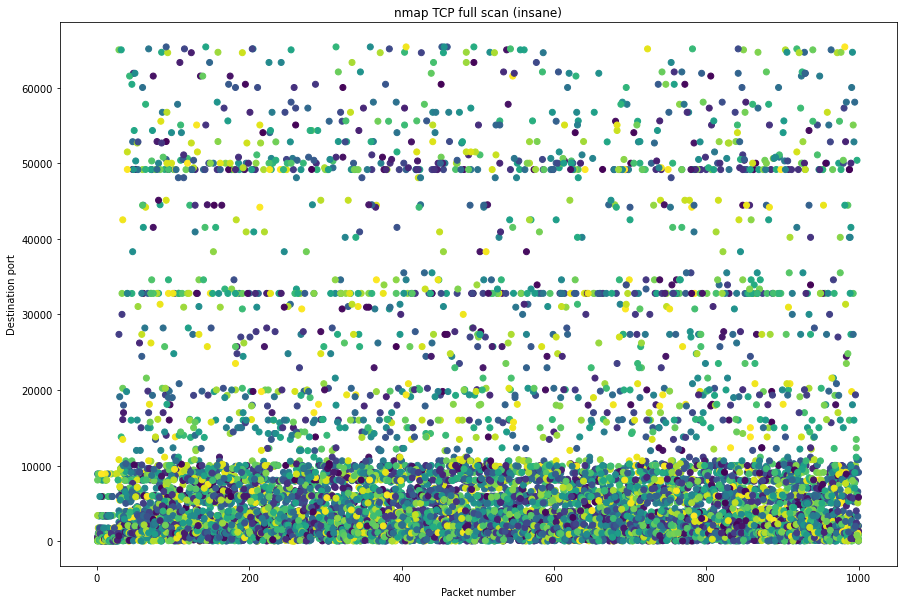

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [18]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

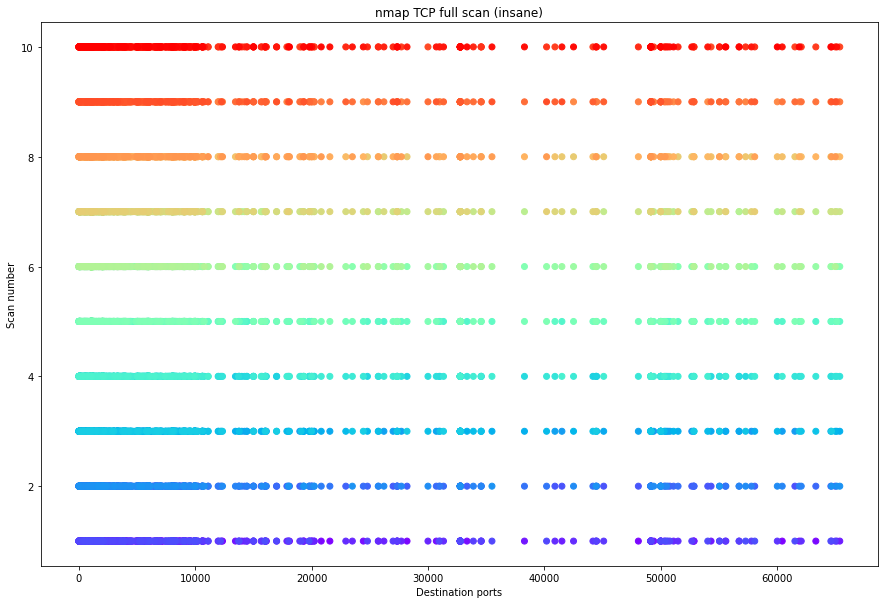

In [20]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [21]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

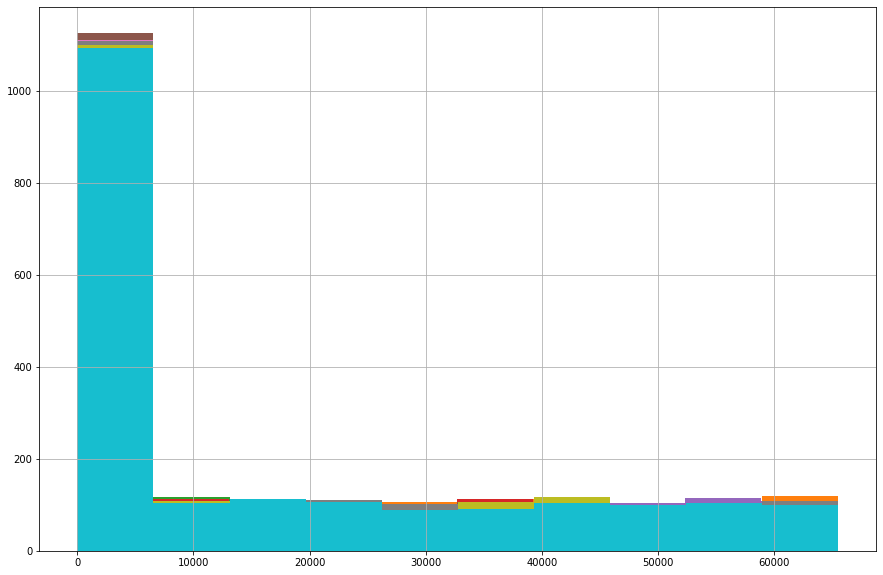

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

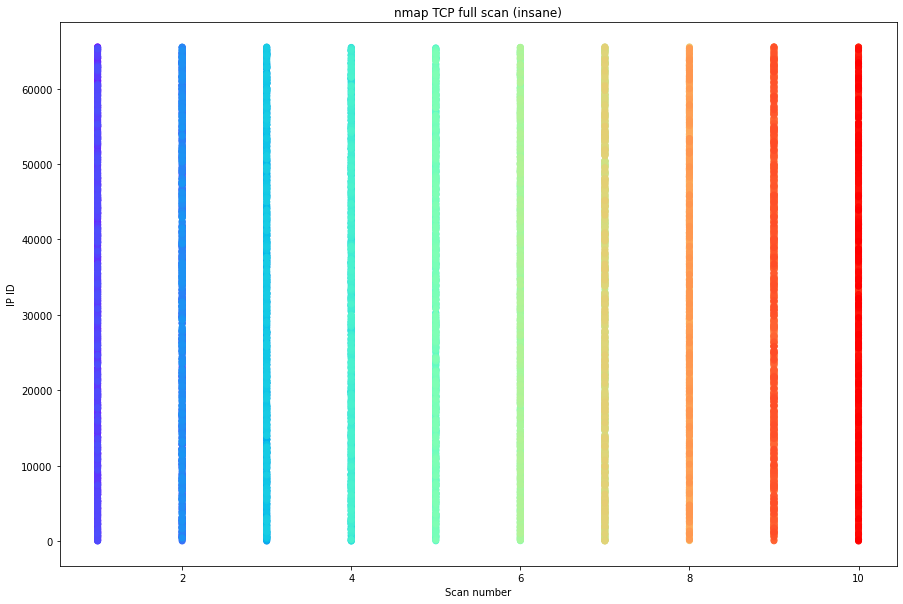

In [26]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


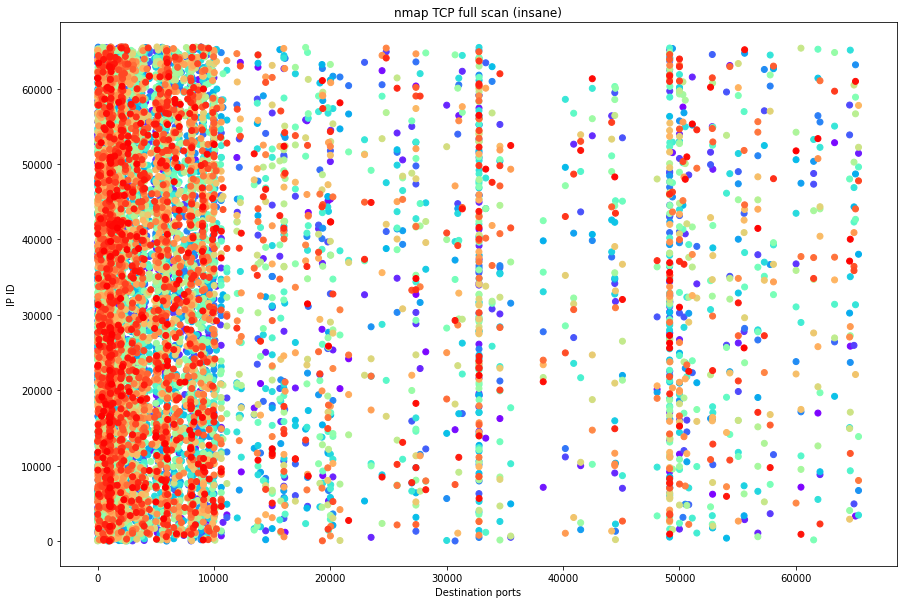

In [27]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

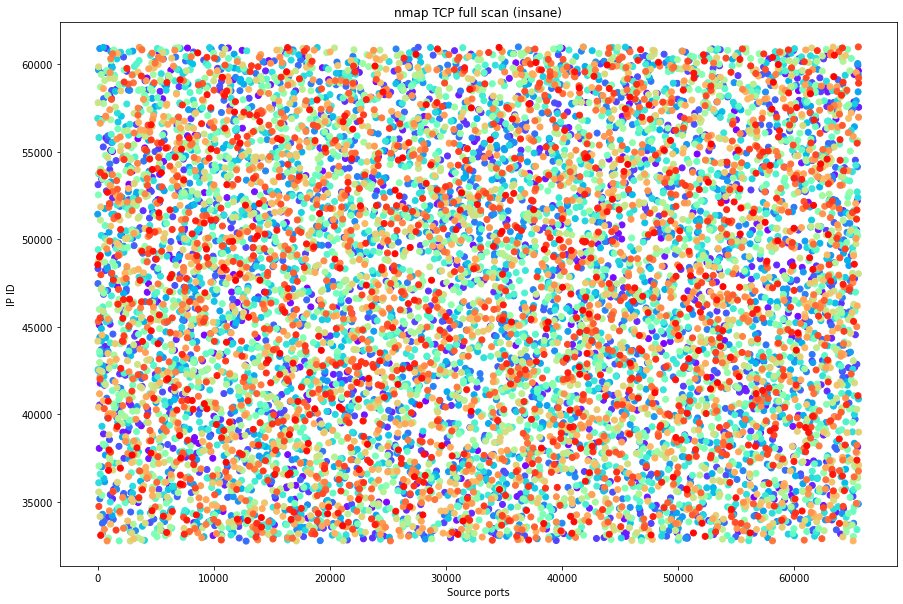

In [28]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 3615671953
Sequence number: 379167081
Sequence number: 346484074
Sequence number: 4287905455
Sequence number: 2311870298
Sequence number: 3089094428
Sequence number: 3004431036
Sequence number: 1326496032
Sequence number: 3619174369
Sequence number: 2029047587
Sequence number: 1973230843
Sequence number: 2753688175
Sequence number: 1413076874
Sequence number: 939276252
Sequence number: 2822044533
Sequence number: 771186861
Sequence number: 926586929
Sequence number: 1398520723
Sequence number: 1281526725
Sequence number: 944385052
Sequence number: 530576645
Sequence number: 3609337191
Sequence number: 449069393
Sequence number: 384876560
Sequence number: 2820746728
Sequence number: 420247255
Sequence number: 770705344
Sequence number: 3087921206
Sequence number: 3083217067
Sequence number: 2987799836
Sequence number: 3210062904
Sequence number: 3585002630
Sequence number: 2374551181
Sequence number: 1129108594
Sequence number: 3162203896
Sequence number: 1854647846
Seq

Sequence number: 313024106
Sequence number: 2185508111
Sequence number: 48800684
Sequence number: 667778394
Sequence number: 2261469281
Sequence number: 4204306670
Sequence number: 2048444141
Sequence number: 2951664978
Sequence number: 1728111148
Sequence number: 3773501489
Sequence number: 1431231109
Sequence number: 257633251
Sequence number: 2235656347
Sequence number: 3574560536
Sequence number: 2237225095
Sequence number: 2636206679
Sequence number: 3420002681
Sequence number: 2403127159
Sequence number: 3019675964
Sequence number: 3925922376
Sequence number: 3560784702
Sequence number: 697502514
Sequence number: 4094518291
Sequence number: 1822991616
Sequence number: 1441173190
Sequence number: 433767614
Sequence number: 77680795
Sequence number: 1934512636
Sequence number: 4011262593
Sequence number: 1899507167
Sequence number: 1653813796
Sequence number: 650752963
Sequence number: 1359945131
Sequence number: 1746774667
Sequence number: 2402076905
Sequence number: 2679160972
Se

Sequence number: 1498880335
Sequence number: 2746221082
Sequence number: 3075168273
Sequence number: 3660955677
Sequence number: 879775201
Sequence number: 3655442230
Sequence number: 3362238011
Sequence number: 1119313938
Sequence number: 1335952450
Sequence number: 1715073904
Sequence number: 1878213301
Sequence number: 3646866834
Sequence number: 2337008397
Sequence number: 3112985461
Sequence number: 2554155612
Sequence number: 2783424518
Sequence number: 1936934025
Sequence number: 3470263122
Sequence number: 3709647464
Sequence number: 2757211469
Sequence number: 844277655
Sequence number: 929921947
Sequence number: 1782646299
Sequence number: 2057484270
Sequence number: 2464162919
Sequence number: 4277754086
Sequence number: 3829233282
Sequence number: 228557572
Sequence number: 1046471189
Sequence number: 987749430
Sequence number: 3384166801
Sequence number: 217869686
Sequence number: 4144852224
Sequence number: 3322682544
Sequence number: 2552583324
Sequence number: 209846373

Sequence number: 3174206859
Sequence number: 338714833
Sequence number: 1593409372
Sequence number: 1964253073
Sequence number: 1967511591
Sequence number: 2050799777
Sequence number: 314650816
Sequence number: 478742370
Sequence number: 753019163
Sequence number: 1003232753
Sequence number: 3385261013
Sequence number: 2135835164
Sequence number: 1549799708
Sequence number: 2079970851
Sequence number: 3567495665
Sequence number: 546730812
Sequence number: 509293707
Sequence number: 2947621286
Sequence number: 1967894064
Sequence number: 630592690
Sequence number: 1194099898
Sequence number: 2478917343
Sequence number: 2318179408
Sequence number: 3130469242
Sequence number: 3767119381
Sequence number: 1391183889
Sequence number: 25787039
Sequence number: 2910753943
Sequence number: 2865103281
Sequence number: 1507356213
Sequence number: 3476733025
Sequence number: 1676567292
Sequence number: 2238825079
Sequence number: 3074417693
Sequence number: 2523294532
Sequence number: 1966560878
S

Sequence number: 3926612982
Sequence number: 2562711084
Sequence number: 2025976643
Sequence number: 1681805718
Sequence number: 3712392987
Sequence number: 3490846068
Sequence number: 425773398
Sequence number: 402830127
Sequence number: 1389712992
Sequence number: 2746202694
Sequence number: 3998574150
Sequence number: 3933991688
Sequence number: 3462190363
Sequence number: 4061436355
Sequence number: 3058341159
Sequence number: 2703391967
Sequence number: 2894645446
Sequence number: 2876330956
Sequence number: 806260232
Sequence number: 521618187
Sequence number: 4234357822
Sequence number: 1189263753
Sequence number: 3425367096
Sequence number: 3098423067
Sequence number: 2403289711
Sequence number: 2127574411
Sequence number: 592090476
Sequence number: 1932488140
Sequence number: 3653565985
Sequence number: 3718291315
Sequence number: 3112260823
Sequence number: 456370263
Sequence number: 2343476315
Sequence number: 3650571668
Sequence number: 2814781622
Sequence number: 268500568

Sequence number: 1953521825
Sequence number: 2974292935
Sequence number: 3828229070
Sequence number: 1160578934
Sequence number: 3961770982
Sequence number: 802420517
Sequence number: 3951776964
Sequence number: 4171149682
Sequence number: 1344109278
Sequence number: 1191553587
Sequence number: 4028669692
Sequence number: 1869826400
Sequence number: 255309626
Sequence number: 3112444514
Sequence number: 1275433394
Sequence number: 2525551184
Sequence number: 1948378157
Sequence number: 1628348386
Sequence number: 3977763845
Sequence number: 74923653
Sequence number: 4004798467
Sequence number: 1721740237
Sequence number: 33090189
Sequence number: 1833645503
Sequence number: 2318567681
Sequence number: 4176125372
Sequence number: 3612298544
Sequence number: 451787265
Sequence number: 2384282725
Sequence number: 3343739189
Sequence number: 2761801815
Sequence number: 3082047231
Sequence number: 1148575102
Sequence number: 1485731344
Sequence number: 2943507458
Sequence number: 2036819877

Sequence number: 1603729868
Sequence number: 4189592784
Sequence number: 1626675266
Sequence number: 4209769435
Sequence number: 2683874675
Sequence number: 1692749816
Sequence number: 2595772226
Sequence number: 1005225877
Sequence number: 3843791465
Sequence number: 3309263315
Sequence number: 2240941092
Sequence number: 753548781
Sequence number: 2810889796
Sequence number: 1961649089
Sequence number: 169035895
Sequence number: 1860083462
Sequence number: 2583034555
Sequence number: 2437606670
Sequence number: 2675005587
Sequence number: 580308440
Sequence number: 244807697
Sequence number: 3908640216
Sequence number: 3279620486
Sequence number: 2258253720
Sequence number: 1996350178
Sequence number: 3409712956
Sequence number: 1042331997
Sequence number: 87854719
Sequence number: 4248526414
Sequence number: 3078962181
Sequence number: 2429413009
Sequence number: 1599350040
Sequence number: 1999573632
Sequence number: 2698408994
Sequence number: 1658749494
Sequence number: 381829416

Sequence number: 1477239144
Sequence number: 3827528712
Sequence number: 3331589147
Sequence number: 973420959
Sequence number: 2503286972
Sequence number: 4284362422
Sequence number: 3390975768
Sequence number: 290640499
Sequence number: 978114852
Sequence number: 860714278
Sequence number: 2653715019
Sequence number: 492330831
Sequence number: 3417810743
Sequence number: 1236953216
Sequence number: 577820512
Sequence number: 1823876563
Sequence number: 3031298148
Sequence number: 1921403874
Sequence number: 2753937120
Sequence number: 556309929
Sequence number: 3679645992
Sequence number: 2875943200
Sequence number: 3212440682
Sequence number: 2082780636
Sequence number: 119143203
Sequence number: 3364824573
Sequence number: 283777194
Sequence number: 1610864858
Sequence number: 2742235386
Sequence number: 1922412408
Sequence number: 2266670347
Sequence number: 4083755081
Sequence number: 2708935217
Sequence number: 4066096522
Sequence number: 845113485
Sequence number: 1636355243
Se

Sequence number: 3696231779
Sequence number: 2013711579
Sequence number: 285249836
Sequence number: 296285642
Sequence number: 3308160147
Sequence number: 488757213
Sequence number: 1767591586
Sequence number: 555662257
Sequence number: 2294592714
Sequence number: 2812783669
Sequence number: 488038039
Sequence number: 3185413216
Sequence number: 894408717
Sequence number: 1853191641
Sequence number: 3064129565
Sequence number: 1021989817
Sequence number: 1835909278
Sequence number: 4056131515
Sequence number: 2331536860
Sequence number: 3002611515
Sequence number: 319381072
Sequence number: 2894509400
Sequence number: 1925420615
Sequence number: 952800394
Sequence number: 2731628410
Sequence number: 2502197296
Sequence number: 4278912492
Sequence number: 2707536700
Sequence number: 3526573704
Sequence number: 2583953274
Sequence number: 2172453897
Sequence number: 4236296361
Sequence number: 3532695089
Sequence number: 3771615625
Sequence number: 549272401
Sequence number: 339929972
Se

Sequence number: 1470920584
Sequence number: 1710387293
Sequence number: 3545659576
Sequence number: 2112605946
Sequence number: 2690278049
Sequence number: 305227919
Sequence number: 2287238582
Sequence number: 2493708414
Sequence number: 1747841182
Sequence number: 3581449432
Sequence number: 757084147
Sequence number: 1792824246
Sequence number: 1979582690
Sequence number: 3227359222
Sequence number: 4220626622
Sequence number: 168063479
Sequence number: 1962389016
Sequence number: 3468282337
Sequence number: 2495843570
Sequence number: 3117709099
Sequence number: 1411621563
Sequence number: 872463984
Sequence number: 3559346189
Sequence number: 3917709942
Sequence number: 1288259814
Sequence number: 374801897
Sequence number: 978781915
Sequence number: 2943969182
Sequence number: 3470039682
Sequence number: 490080374
Sequence number: 2417024915
Sequence number: 316445041
Sequence number: 2563253702
Sequence number: 2565215404
Sequence number: 247657659
Sequence number: 3415438808
S

Sequence number: 3433729727
Sequence number: 1293864339
Sequence number: 922700544
Sequence number: 2150367038
Sequence number: 3799189257
Sequence number: 2749768157
Sequence number: 2406583093
Sequence number: 1533365264
Sequence number: 973537682
Sequence number: 3245427362
Sequence number: 973259488
Sequence number: 2786322076
Sequence number: 1942468109
Sequence number: 3390393640
Sequence number: 178986903
Sequence number: 3452562836
Sequence number: 1191153131
Sequence number: 4151801517
Sequence number: 4277762083
Sequence number: 3258599906
Sequence number: 4249386654
Sequence number: 2611849767
Sequence number: 485210116
Sequence number: 2033113288
Sequence number: 3774597070
Sequence number: 1395366013
Sequence number: 1615930211
Sequence number: 588544915
Sequence number: 3161608320
Sequence number: 1139506316
Sequence number: 2548301754
Sequence number: 3340523492
Sequence number: 1444091124
Sequence number: 1800099535
Sequence number: 781195311
Sequence number: 416874719


Sequence number: 145568188
Sequence number: 3946745687
Sequence number: 4292507604
Sequence number: 2309605210
Sequence number: 4083913425
Sequence number: 2687872044
Sequence number: 2493669980
Sequence number: 2357517132
Sequence number: 2920632195
Sequence number: 1081341499
Sequence number: 226822539
Sequence number: 3675514291
Sequence number: 1170787327
Sequence number: 1097046166
Sequence number: 1321519581
Sequence number: 2917172578
Sequence number: 1695214305
Sequence number: 899312514
Sequence number: 1562355666
Sequence number: 1462742033
Sequence number: 1948768709
Sequence number: 3870410928
Sequence number: 2690170003
Sequence number: 3474628812
Sequence number: 2184967020
Sequence number: 1786818125
Sequence number: 2562856526
Sequence number: 918723986
Sequence number: 230158829
Sequence number: 3501338574
Sequence number: 3944402851
Sequence number: 308771869
Sequence number: 2225213758
Sequence number: 2625197890
Sequence number: 394767230
Sequence number: 2103152396

Sequence number: 2148339527
Sequence number: 454700082
Sequence number: 3525911732
Sequence number: 763437893
Sequence number: 4148116257
Sequence number: 1714484024
Sequence number: 2183333819
Sequence number: 1495615248
Sequence number: 3639390930
Sequence number: 3386273957
Sequence number: 4080520457
Sequence number: 4170621131
Sequence number: 2141400447
Sequence number: 1148214591
Sequence number: 1304111476
Sequence number: 2514050927
Sequence number: 755029319
Sequence number: 1603631664
Sequence number: 1240374457
Sequence number: 4178673881
Sequence number: 447471443
Sequence number: 1257865412
Sequence number: 3583493457
Sequence number: 990470113
Sequence number: 683789151
Sequence number: 1850010097
Sequence number: 3602753842
Sequence number: 3333538302
Sequence number: 904778489
Sequence number: 1010145558
Sequence number: 1364787931
Sequence number: 1189019701
Sequence number: 2015785179
Sequence number: 1627047125
Sequence number: 2551445015
Sequence number: 1767872916

Sequence number: 2383500082
Sequence number: 3663063357
Sequence number: 1149217699
Sequence number: 1633316662
Sequence number: 1952577404
Sequence number: 2984236270
Sequence number: 1036319698
Sequence number: 7543981
Sequence number: 2984288725
Sequence number: 1231948132
Sequence number: 1993605894
Sequence number: 2015832106
Sequence number: 4242181470
Sequence number: 4174718985
Sequence number: 488647778
Sequence number: 2439099943
Sequence number: 494180405
Sequence number: 2605747884
Sequence number: 3578803959
Sequence number: 2771006387
Sequence number: 2346156514
Sequence number: 2044019542
Sequence number: 2141866590
Sequence number: 1396357972
Sequence number: 913124373
Sequence number: 1201911070
Sequence number: 1929232465
Sequence number: 2719615359
Sequence number: 2802732377
Sequence number: 2156047816
Sequence number: 2840567267
Sequence number: 1396878843
Sequence number: 2793864726
Sequence number: 376539590
Sequence number: 318103199
Sequence number: 1126324241


Sequence number: 1378218791
Sequence number: 4261701348
Sequence number: 2149566721
Sequence number: 3686563388
Sequence number: 3657899340
Sequence number: 2363107790
Sequence number: 3377223845
Sequence number: 2625013026
Sequence number: 1021176545
Sequence number: 283602623
Sequence number: 892223788
Sequence number: 2667017787
Sequence number: 2258347637
Sequence number: 188871824
Sequence number: 283315966
Sequence number: 2879842189
Sequence number: 2243376380
Sequence number: 2963646403
Sequence number: 3665388591
Sequence number: 714970091
Sequence number: 2283441148
Sequence number: 1160663734
Sequence number: 1899305517
Sequence number: 1314834205
Sequence number: 2282567620
Sequence number: 3125972939
Sequence number: 384703005
Sequence number: 3211738929
Sequence number: 2540122184
Sequence number: 390528935
Sequence number: 1732951528
Sequence number: 2287955419
Sequence number: 2117446453
Sequence number: 2417038191
Sequence number: 1986314449
Sequence number: 3502605130

Sequence number: 4031167199
Sequence number: 1661402236
Sequence number: 1975669029
Sequence number: 30280599
Sequence number: 1860042866
Sequence number: 3974742943
Sequence number: 1144144273
Sequence number: 3775214657
Sequence number: 624428658
Sequence number: 3797726858
Sequence number: 2025509321
Sequence number: 2470728115
Sequence number: 1637738556
Sequence number: 1937391608
Sequence number: 3670611971
Sequence number: 2201020545
Sequence number: 3442534219
Sequence number: 1574507689
Sequence number: 1942330387
Sequence number: 3539581907
Sequence number: 2183784305
Sequence number: 10761791
Sequence number: 1592468194
Sequence number: 1022102425
Sequence number: 3335340741
Sequence number: 4222927260
Sequence number: 1596817676
Sequence number: 423368324
Sequence number: 836911999
Sequence number: 1339558917
Sequence number: 3951939241
Sequence number: 1776950080
Sequence number: 3880291204
Sequence number: 4292810792
Sequence number: 880172327
Sequence number: 1806074183


Sequence number: 1315295141
Sequence number: 2350782530
Sequence number: 61313219
Sequence number: 1161963669
Sequence number: 3386101603
Sequence number: 3675706973
Sequence number: 997007289
Sequence number: 4284927057
Sequence number: 2965679995
Sequence number: 1887103572
Sequence number: 2419584127
Sequence number: 3306974437
Sequence number: 2570864278
Sequence number: 637145732
Sequence number: 3909801671
Sequence number: 1831831875
Sequence number: 91138791
Sequence number: 938802739
Sequence number: 1135786975
Sequence number: 2289387993
Sequence number: 776328609
Sequence number: 3584157645
Sequence number: 4104327397
Sequence number: 3414100401
Sequence number: 2876474021
Sequence number: 1648616885
Sequence number: 1816206485
Sequence number: 3835985946
Sequence number: 3557616546
Sequence number: 3366820675
Sequence number: 498582296
Sequence number: 1022619939
Sequence number: 2301290016
Sequence number: 352245240
Sequence number: 2703472301
Sequence number: 330090100
Seq

Sequence number: 3750989043
Sequence number: 509121114
Sequence number: 3563942561
Sequence number: 27404439
Sequence number: 3051206448
Sequence number: 3279740366
Sequence number: 2870165345
Sequence number: 319345268
Sequence number: 2048860569
Sequence number: 478928674
Sequence number: 2901833344
Sequence number: 144065888
Sequence number: 1935557428
Sequence number: 3146927592
Sequence number: 3294352128
Sequence number: 1549454234
Sequence number: 1611679979
Sequence number: 2988195426
Sequence number: 1693575955
Sequence number: 2469513664
Sequence number: 430141346
Sequence number: 2933656919
Sequence number: 990548857
Sequence number: 3706201569
Sequence number: 2084512540
Sequence number: 3580062353
Sequence number: 4107509968
Sequence number: 691598331
Sequence number: 4279840600
Sequence number: 219006646
Sequence number: 3874653710
Sequence number: 724927912
Sequence number: 3983047031
Sequence number: 1534928266
Sequence number: 3304793153
Sequence number: 26548719
Seque

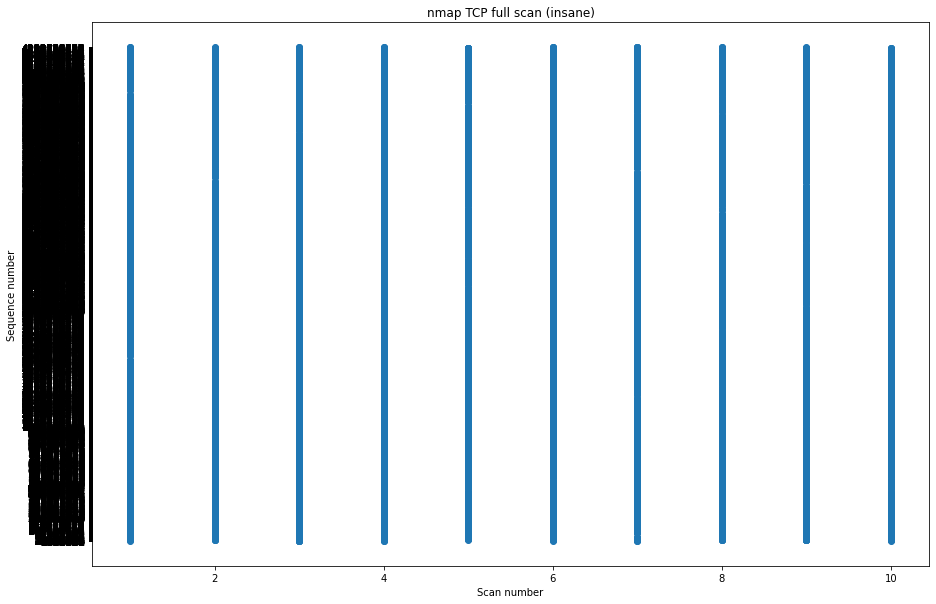

In [32]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


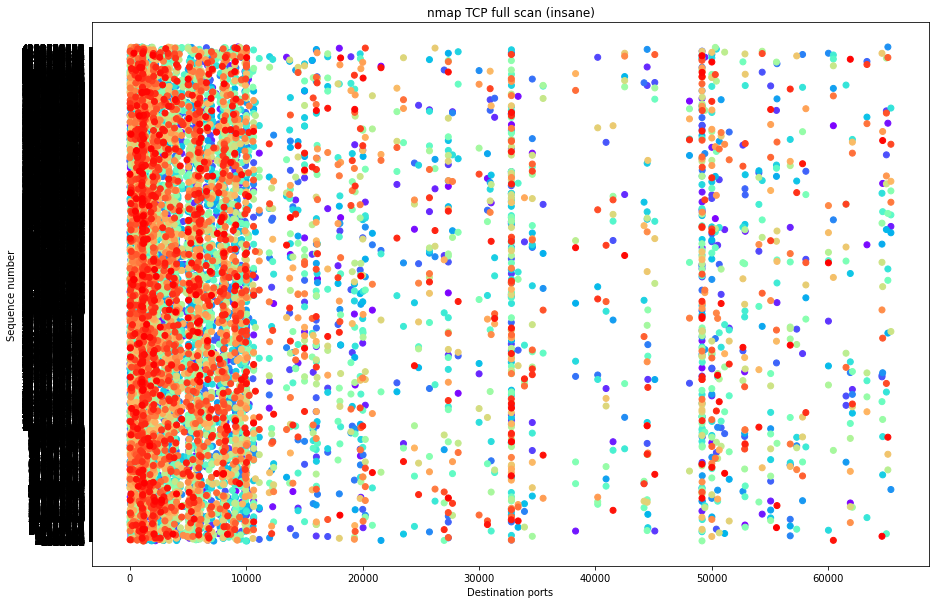

In [33]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

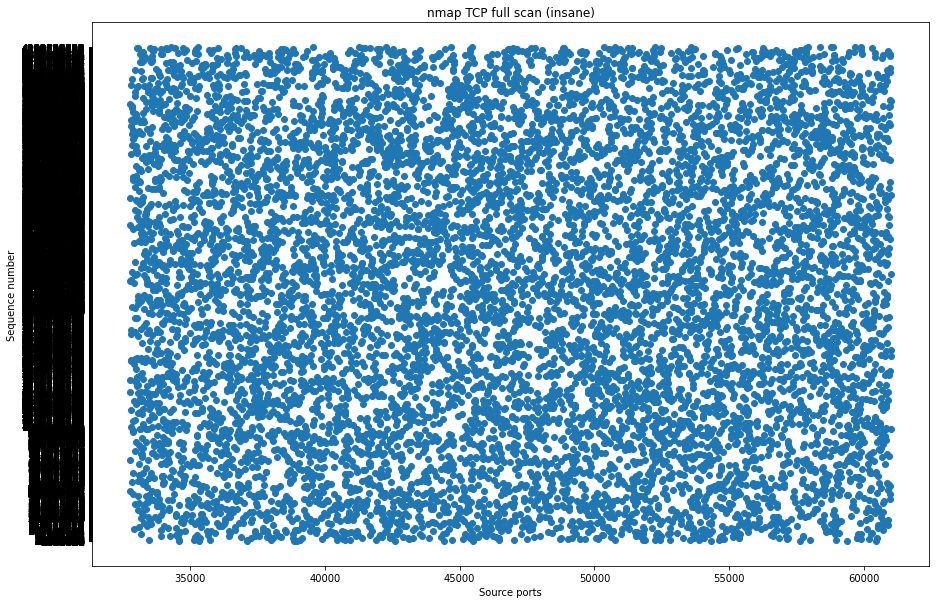

In [34]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [35]:
len(set(orders_port['sport']))

7108

## Flags

In [36]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F